# Creating a Synthetic Phantom

This example shows how to create a simple synthetic breast phantom with a set of regularly shaped inclusions. The tissue properties can be represented on arbitrary point clouds. In this example, we will use a rectilinear mesh.

First, we need to import a few utilities.

In [1]:
import usct_tools as usct
import numpy as np

To ensure that we will always use the same parameters later on, we create a trivial callback function that returns a dictionary of material parameters. In this example, we parameterize the phantom by its soundspeed (in `m/s`) and density (in `kg/m^3`).

In [2]:
def get_parameters(vp, rho):
    return {'soundspeed': vp, 'density': rho}

This example will create a phantom in 2D, so we can readily plot in the notebook. Note that the extension to 3D is straightforward though.

Let's start with a rectilinear mesh that extends from `(-0.1, -0.1)` to `(0.1,0.1)` with 400 grid points in each dimension.

In [3]:
g = usct.grid(2, [-0.1,-0.1], [0.0005,0.0005], np.array([400,400]))

We start by initializing the phantom with the background parameters of water. 
To do this, we create a phantom object with all the grid points of our domain and pass on a dictionary with the values of the homogeneous background medium.

In [4]:
parameters = get_parameters(vp=1500.0, rho=1000.0)
p = usct.phantom(g.points(), parameters)

The phantom object does not contain any topological information. So visualize the phantom, we may thus attach the parameter fields to the grid object and plot them on the grid.

Adding new field soundspeed
Adding new field density


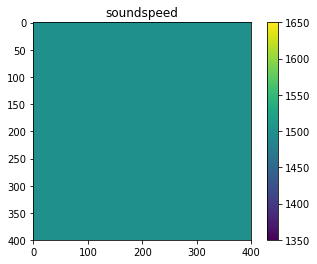

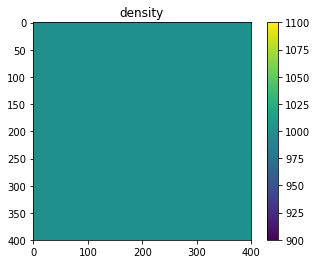

In [5]:
for f in parameters:
    g.attach_field(f, p.data[f])
g.plot()

Pretty boring so far, but at least the values look correct. Let's start adding the phantom by inserting simple shapes into the domain. There are a couple of preimplemented shapes that we may use: `Sphere`, `Ring`, `Ellipsoid`, `Rectangle` and `Cylinder`. We can either insert them into the phantom object, in which case existing parameter values will be replaced, or add them as perturbations to the already existing values in the phantom.

Let's start by inserting a sphere for the main part of the phantom, as well as a thin ring representing the skin with a high soundspeed of `1650 m/s`.

Overwriting field soundspeed
Overwriting field density


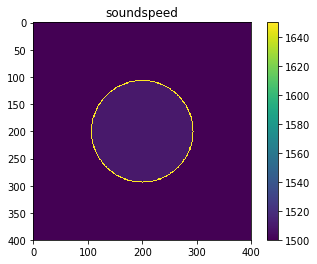

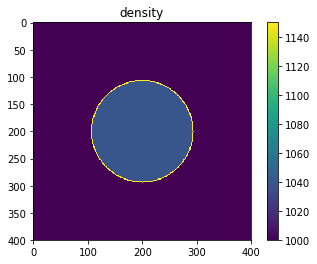

In [6]:
p.insert_shape(usct.Sphere([0.0,0.0], 0.047), get_parameters(vp=1510.0, rho=1040.0))
p.insert_shape(usct.Ring([0.0,0.0], 0.047, 0.046), get_parameters(vp=1650.0, rho=1150.0))

for f in parameters:
    g.attach_field(f, p.data[f])
g.plot()

We can now play around with additional inclusions and add or insert them into the phantom. In this example, we use spherical and ellipsoidal inclusions of various sizes, representing high- and low-velocity inclusions. Note that you can also rotate the objects before inserting them into the phantom.

Overwriting field soundspeed
Overwriting field density


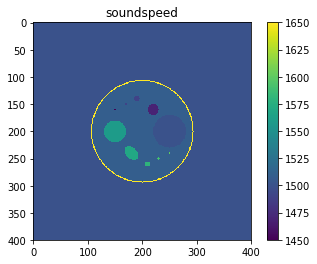

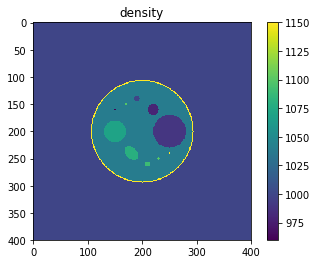

In [7]:
p.insert_shape(usct.Sphere([0.0, 0.025], 0.01), 
            get_parameters(vp=1460, rho=980.0))

p.insert_shape(usct.Sphere([0.0, -0.025], 0.01), 
            get_parameters(vp=1560, rho=1070.0))

p.insert_shape(usct.Ellipsoid([0.02, -0.01], [0.005, 0.0075], rotation_angles=45.0), 
            get_parameters(vp=1570.0, rho=1080.0))

p.insert_shape(usct.Sphere([0.02, -0.01], 0.005), 
            get_parameters(vp=1570, rho=1080.0))

p.insert_shape(usct.Sphere([0.03, 0.005], 0.0025), 
            get_parameters(vp=1580, rho=1090.0))

p.insert_shape(usct.Sphere([0.025, 0.015], 0.00125), 
            get_parameters(vp=1590, rho=1100.0))

p.insert_shape(usct.Sphere([0.02, 0.025], 0.000625), 
            get_parameters(vp=1600, rho=1150.0))

p.insert_shape(usct.Sphere([0.0, 0.025], 0.015), 
            get_parameters(vp=1500, rho=990.0))

p.insert_shape(usct.Sphere([-0.02, 0.01], 0.005), 
            get_parameters(vp=1470, rho=980.0))

p.insert_shape(usct.Sphere([-0.03, -0.005], 0.0025), 
            get_parameters(vp=1490, rho=1000.0))

p.insert_shape(usct.Sphere([-0.025, -0.015], 0.00125), 
            get_parameters(vp=1490, rho=1100.0))

p.add_shape(usct.Sphere([-0.02, -0.025], 0.000625), 
            get_parameters(vp=-60, rho=-80.0))


for f in parameters:
    g.attach_field(f, p.data[f])
g.plot()

That's it. Feel free to play around with the shapes and create your own phantom.